In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [26]:
df = pd.read_csv('cumulative.csv')

In [27]:
df_noerr = df.drop(labels=['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
                           'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
                           'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2',
                           'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 
                           'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 
                           'koi_srad_err1', 'koi_srad_err2'], axis=1)

In [28]:
df_noerr.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [29]:
df_noerr.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509


## Variable dictionary

* `koi_period` - The interval between consecutive planetary transits.
* `koi_time0bk` - The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC.
* `koi_impact` - The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.
* `koi_duration` - The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.
* `koi_depth` - The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.
* `koi_prad` - The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.
* `koi_teq` - Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.
* `koi_insol` - Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.
* `koi_model_snr` - Transit depth normalized by the mean uncertainty in the flux during the transits.
* `koi_tce_plnt_num` - CE Planet Number federated to the KOI.
* `koi_tce_delivname` - TCE delivery name corresponding to the TCE data federated to the KOI.
* `koi_steff` - The photospheric temperature of the star.
* `koi_slogg` - The base-10 logarithm of the acceleration due to gravity at the surface of the star.
* `ra` - Right ascension.
* `da` - KIC declination.
* `koi_mag` - Kepler-band (mag)

In [30]:
df_noerr = df_noerr.drop(labels=['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'], axis=1)

In [31]:
conf = df_noerr[df_noerr['koi_disposition'] == 'CONFIRMED']
fp = df_noerr[df_noerr['koi_disposition'] == 'FALSE POSITIVE']

In [32]:
fp.drop(labels=['kepler_name'], axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
conf = conf.dropna()
conf.reset_index(inplace=True)

In [34]:
fp = fp.dropna()
fp.reset_index(inplace=True)

In [35]:
conf.columns.values

array(['index', 'rowid', 'kepid', 'kepoi_name', 'kepler_name',
       'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_slogg',
       'koi_srad', 'ra', 'dec', 'koi_kepmag'], dtype=object)

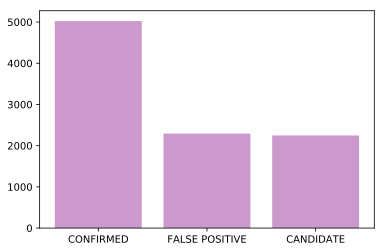

In [36]:
plt.bar(x=df_noerr['koi_disposition'].unique(), height=df_noerr['koi_disposition'].value_counts(),
        color='purple', alpha=0.4);

## Planetary period

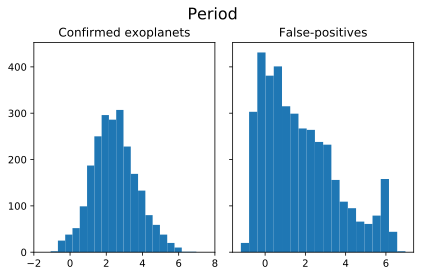

In [37]:
fig, axes = plt.subplots(1, 2, sharey=True)

fig.suptitle('Period', size=16)

axes[0].hist(np.log(conf[np.log1p(conf['koi_period']) < 8]['koi_period']), bins=20)
axes[0].set_xlim([-2, 8])
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(np.log(fp['koi_period']), bins=20)
axes[0].set_xlim([-2, 8])
axes[1].set_title('False-positives');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Time of discovery

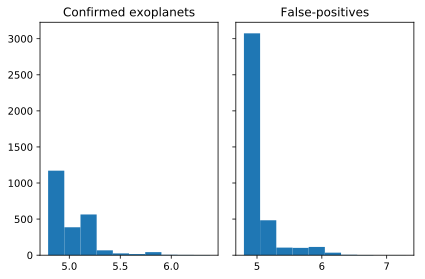

In [38]:
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].hist(np.log(conf['koi_time0bk']))
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(np.log(fp['koi_time0bk']))
axes[1].set_title('False-positives');

plt.tight_layout()

## Impact

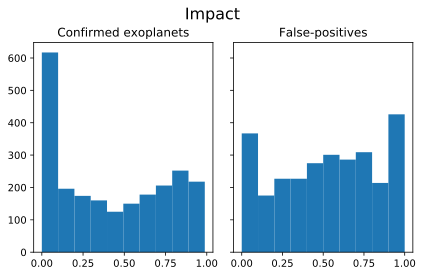

In [39]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('Impact', size=16)

axes[0].hist(conf[conf['koi_impact'] < 1]['koi_impact'])
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(fp[fp['koi_impact'] <= 1]['koi_impact'])
axes[1].set_title('False-positives');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Duration

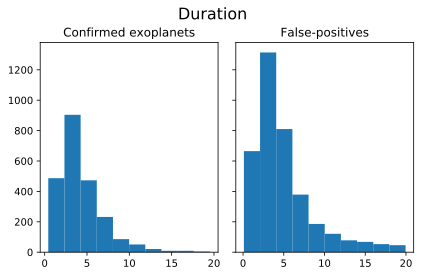

In [40]:
fig, axes = plt.subplots(1, 2, sharey=True)

fig.suptitle('Duration', size=16)

axes[0].hist(conf[conf['koi_duration'] < 20]['koi_duration'])
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(fp[fp['koi_duration'] < 20]['koi_duration'])
axes[1].set_title('False-positives');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

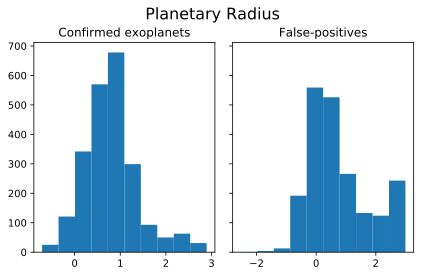

In [41]:
fig, axes = plt.subplots(1, 2, sharey=True)

fig.suptitle('Planetary Radius', size=16)

axes[0].hist(np.log(conf[conf['koi_prad'] < 20]['koi_prad']))
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(np.log(fp[fp['koi_prad'] < 20]['koi_prad']))
axes[1].set_title('False-positives');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

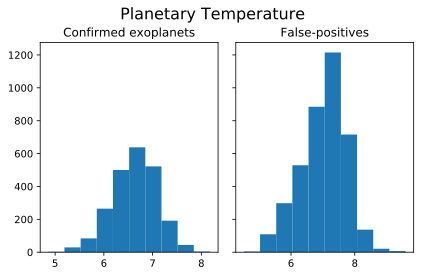

In [42]:
fig, axes = plt.subplots(1, 2, sharey=True)

fig.suptitle('Planetary Temperature', size=16)

axes[0].hist(np.log(conf['koi_teq']))
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(np.log(fp['koi_teq']))
axes[1].set_title('False-positives');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

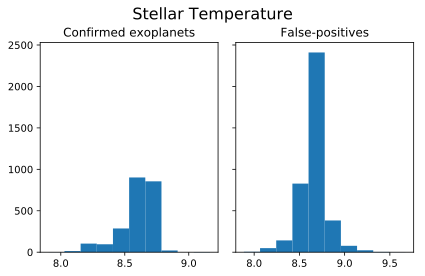

In [43]:
fig, axes = plt.subplots(1, 2, sharey=True)

fig.suptitle('Stellar Temperature', size=16)

axes[0].hist(np.log(conf['koi_steff']))
axes[0].set_title('Confirmed exoplanets')

axes[1].hist(np.log(fp['koi_steff']))
axes[1].set_title('False-positives');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Scatters

In [44]:
df_noerr = df_noerr.drop(labels=['kepler_name', 'koi_score'], axis=1)

In [46]:
df_noerr = df_noerr.dropna()

In [48]:
df_noerr = df_noerr[df_noerr['koi_disposition'] != 'CANDIDATE']

In [51]:
conf.shape[0] + fp.shape[0]

6202

In [52]:
import re

In [55]:
df_noerr.columns = df_noerr.columns.map(lambda x: re.sub('koi_', '', x))

In [58]:
df_noerr['disposition'].value_counts()

FALSE POSITIVE    4524
CONFIRMED         2285
Name: disposition, dtype: int64

In [79]:
df_noerr['disposition'].value_counts()

FALSE POSITIVE    4524
CONFIRMED         2285
Name: disposition, dtype: int64

In [80]:
color = ['purple' if x == 'CONFIRMED' else 'green' for x in df_noerr['disposition']]

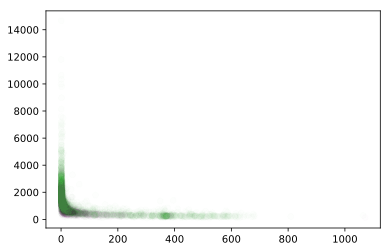

In [82]:

def scatter_color(feature1, feature2):
    plt.scatter(x = df_noerr['period'], y = df_noerr['teq'], alpha=0.01, c = color)
    ;